# P300 Demo
In this exercise, we will work with a dataset where subjects observed images of target and non-target objects while having their neural activity recorded with scalp EEG. We will create and fit a model that predicts which category of object they saw based on their observed brain activity. This takes the form of a binary classification problem. 

### Loading the data

In [1]:
filename = '../data/P300.mat' # the data file
import scipy.io as sio # the library that we use to load Matlab data into Python
data = sio.loadmat(filename)

### Inspect the data

In [2]:
x_train = data['X_train']
x_test = data['X_test']
y_train = data['Y_train']
y_test = data['Y_test']

print("The shape of the training features is " + str(x_train.shape))
print("The shape of the training labels is " + str(y_train.shape))
print("The shape of the test features is " + str(x_test.shape))
print("The shape of the test labels is " + str(y_test.shape))

The shape of the training features is (1058, 64, 128)
The shape of the training labels is (1058, 2)
The shape of the test features is (530, 64, 128)
The shape of the test labels is (530, 2)


#### Note: Features are shaped (example, electrode, time samples). Labels are shaped (example, 2), where the 2 refers to target versus non-target

### Let's take a look at one of the exemplars

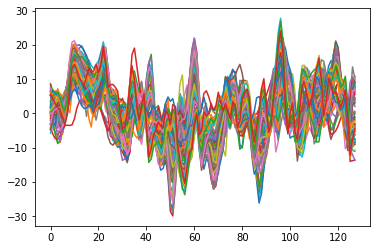

In [3]:
import numpy as np # Python's array library
import matplotlib.pyplot as plt # a popular library for plotting in Python
trial_idx = 500 # let's look at trial 501
sample_eeg = np.squeeze(x_train[trial_idx,:,:])
plt.plot(sample_eeg.T)
plt.show()

### Inspect the label information

In [4]:
print(y_train[0:10,:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


#### The first column denotes P(non-target). The second column denotes P(target). Notice above that all but one of the first 10 examples was a non-target. The 7th example was a target.

### Let's now define our model

In [5]:
import keras
input_shape=(64,128,1) # this tells Keras the shape of the data that will be passed to it for training/testing
num_classes=2
num_filters = 1
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(num_filters, kernel_size=(64, 10), activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 119, 1)         641       
                                                                 
 flatten (Flatten)           (None, 119)               0         
                                                                 
 dense (Dense)               (None, 2)                 240       
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


#### Our model has 881 parameters. We have 1058 examples. It's a good rule-of-thumb to have at least as many training examples as model parameters. 

### Let's now compile the model, which here means telling Keras what type of loss function we will be using, and which optimizer we would like. 

In [6]:
batch_size = 128  # how many training examples in each "batch" used to compute gradient of loss function
epochs = 10 # how many passes through the data we want the fitting to take

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.AUC()])

#### In the above, we are telling Keras that we will want to monitor both the model accuracy, as well as the area under the ROC curve.

### We are ready to fit the model

In [7]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
9/9 [==============================] - 1s 13ms/step - loss: 3.9711 - accuracy: 0.4093 - auc: 0.3666
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 1.6506 - accuracy: 0.5907 - auc: 0.6267
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 1.1163 - accuracy: 0.6777 - auc: 0.7423
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 0.8481 - accuracy: 0.7561 - auc: 0.8204
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 0.7823 - accuracy: 0.7798 - auc: 0.8404
Epoch 6/10
9/9 [==============================] - 0s 13ms/step - loss: 0.6952 - accuracy: 0.7911 - auc: 0.8424
Epoch 7/10
9/9 [==============================] - 0s 13ms/step - loss: 0.6348 - accuracy: 0.8043 - auc: 0.8526
Epoch 8/10
9/9 [==============================] - 0s 13ms/step - loss: 0.5991 - accuracy: 0.8025 - auc: 0.8612
Epoch 9/10
9/9 [==============================] - 0s 13ms/step - loss: 0.5659 - accuracy: 0.7911 - auc: 0.8647
E

#### Notice that the _training_ performance is quite good: an area under the ROC curve of ~0.87. Now let's see how well the model generalizes. 

### Evaluate the model on unseen data.

In [8]:
metrics = model.evaluate(x_test,y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.7755 - auc: 0.8255


In [9]:
print("The model accuracy is " + str(metrics[1])) # element 0 is loss, 1 is accuracy, 2 is auroc
print("The model AUROC is " + str(metrics[2]))

The model accuracy is 0.7754716873168945
The model AUROC is 0.8254859447479248


#### Not too shabby

### Let's verify performance manually

In [10]:
test_scores = model.predict(x_test)
pred_labels = np.argmax(test_scores,1)
print(test_scores[0:10,:])
print(pred_labels[0:10])

[[9.2094278e-01 7.9057232e-02]
 [9.9997199e-01 2.8034168e-05]
 [2.0536910e-01 7.9463083e-01]
 [9.9460465e-01 5.3953785e-03]
 [4.9861819e-01 5.0138181e-01]
 [9.9979442e-01 2.0559219e-04]
 [9.2902446e-01 7.0975520e-02]
 [7.1409810e-01 2.8590190e-01]
 [9.9538535e-01 4.6146661e-03]
 [3.9196062e-01 6.0803932e-01]]
[0 0 1 0 1 0 0 0 0 1]


#### In the first array above, the first column is P(non-target), while the second is P(target). In the second array, the binary value indicates which class was predicted (0 for predicted non-target, 1 for predicted target).

In [11]:
true_labels = np.argmax(y_test,1)
test_accuracy = np.mean(true_labels==pred_labels)
print(test_accuracy)

0.7754716981132076


### Let's try increasing the number of convolution filters

In [12]:
num_filters = 3
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(num_filters, kernel_size=(64, 10), activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1, 119, 3)         1923      
                                                                 
 flatten_1 (Flatten)         (None, 357)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 716       
                                                                 
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________


#### Notice that we now have 3 times as many parameters. This puts us at risk of overfitting, but we proceed.

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.AUC()])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
9/9 [==============================] - 1s 16ms/step - loss: 1.5815 - accuracy: 0.6456 - auc_1: 0.6831
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 0.9251 - accuracy: 0.7779 - auc_1: 0.8374
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 0.7241 - accuracy: 0.7883 - auc_1: 0.8515
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 0.5606 - accuracy: 0.8053 - auc_1: 0.8734
Epoch 5/10
9/9 [==============================] - 0s 14ms/step - loss: 0.4671 - accuracy: 0.8195 - auc_1: 0.8891
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 0.4182 - accuracy: 0.8393 - auc_1: 0.9101
Epoch 7/10
9/9 [==============================] - 0s 14ms/step - loss: 0.3603 - accuracy: 0.8592 - auc_1: 0.9305
Epoch 8/10
9/9 [==============================] - 0s 14ms/step - loss: 0.3399 - accuracy: 0.8648 - auc_1: 0.9352
Epoch 9/10
9/9 [==============================] - 0s 14ms/step - loss: 0.3232 - accuracy: 0.8828

#### As expected, the training performance gets better. But we need to evaluate the model on _unseen_ data:

In [14]:
metrics = model.evaluate(x_test,y_test)
print("The model accuracy is " + str(metrics[1]))
print("The model AUROC is " + str(metrics[2]))

17/17 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8377 - auc_1: 0.8961
The model accuracy is 0.8377358317375183
The model AUROC is 0.8961321115493774


#### Despite the number of parameters exceeding the number of training examples, the performance does get better.

### Let's try to improve performance by adding regularization

In [15]:
reg_l1_l2 = keras.regularizers.l1_l2(l1=0.001, l2=0.001)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(num_filters, kernel_size=(64, 10), activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer = reg_l1_l2),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1, 119, 3)         1923      
                                                                 
 flatten_2 (Flatten)         (None, 357)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 716       
                                                                 
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________


#### We have added both L1 and L2 regularization to the dense layer.

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.AUC()])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
metrics = model.evaluate(x_test,y_test)
print("The model accuracy is " + str(metrics[1]))
print("The model AUROC is " + str(metrics[2]))

Epoch 1/10
9/9 [==============================] - 1s 15ms/step - loss: 0.2925 - accuracy: 0.8970 - auc_3: 0.9636
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 0.2636 - accuracy: 0.9178 - auc_3: 0.9707
Epoch 3/10
9/9 [==============================] - 0s 16ms/step - loss: 0.2380 - accuracy: 0.9282 - auc_3: 0.9772
Epoch 4/10
9/9 [==============================] - 0s 14ms/step - loss: 0.2040 - accuracy: 0.9433 - auc_3: 0.9849
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2025 - accuracy: 0.9480 - auc_3: 0.9847
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2065 - accuracy: 0.9376 - auc_3: 0.9838
Epoch 7/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2079 - accuracy: 0.9405 - auc_3: 0.9837
Epoch 8/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1672 - accuracy: 0.9575 - auc_3: 0.9904
Epoch 9/10
9/9 [==============================] - 0s 14ms/step - loss: 0.1474 - accuracy: 0.9669

#### Regularization may or may not increase the performance in this case (depends on your random seed), but now you know how to implement it in Keras ;-)

### Somewhat advanced: handle unequal class prevalence in the data. Note that targets are infrequent in P300 experiments (by design).

In [18]:
train_labels = np.argmax(y_train,1)
n_non_targets = np.sum(train_labels==0)
n_targets=np.sum(train_labels==1)
class_ratio = n_targets/n_non_targets
print("The ratio of targets to non targets is " + str(class_ratio))

The ratio of targets to non targets is 0.18876404494382024


In [20]:
class_weight={0:1,1:1/class_ratio}

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.AUC()])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, class_weight=class_weight)
metrics = model.evaluate(x_test,y_test)
print("The model accuracy is " + str(metrics[1]))
print("The model AUROC is " + str(metrics[2]))

Epoch 1/10
9/9 [==============================] - 1s 16ms/step - loss: 0.4115 - accuracy: 0.9130 - auc_5: 0.9721
Epoch 2/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2639 - accuracy: 0.9480 - auc_5: 0.9893
Epoch 3/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2656 - accuracy: 0.9490 - auc_5: 0.9897
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2069 - accuracy: 0.9679 - auc_5: 0.9936
Epoch 5/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1817 - accuracy: 0.9669 - auc_5: 0.9961
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 0.1599 - accuracy: 0.9735 - auc_5: 0.9960
Epoch 7/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1418 - accuracy: 0.9877 - auc_5: 0.9992
Epoch 8/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1247 - accuracy: 0.9858 - auc_5: 0.9990
Epoch 9/10
9/9 [==============================] - 0s 15ms/step - loss: 0.1119 - accuracy: 0.9943